colors

white - FEFEFE
green - #9FF24B
bg - #0F1D26
blue - #3D8BF2
red - #F21365
grey - #6C737A

In [3]:
import sys
sys.path.append("../utils")
import irutilities as irutil
from pathlib import Path
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')  # Use the TkAgg backend
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
from pathlib import Path

# Set the font family
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Source Sans Pro']

colors = {
    'white': (0xFE / 255, 0xFE / 255, 0xFE / 255),  # FEFEFE in RGB
    'green': (0x9F / 255, 0xF2 / 255, 0x4B / 255),  # 9FF24B in RGB
    'bg': (0x0F / 255, 0x1D / 255, 0x26 / 255),    # 0F1D26 in RGB
    'blue': (0x3D / 255, 0x8B / 255, 0xF2 / 255),  # 3D8BF2 in RGB
    'red': (0xF2 / 255, 0x13 / 255, 0x65 / 255),   # F21365 in RGB
    'grey': (0x6C / 255, 0x73 / 255, 0x7A / 255)   # 6C737A in RGB
}

In [4]:
samplerate = 48000
posMic, posSrc, irs = irutil.loadIR(Path('../mesh_rir/S1-M3969_npy'))
print(irs.shape, posMic.shape, posSrc.shape)


(1, 3969, 32768) (3969, 3) (1, 3)


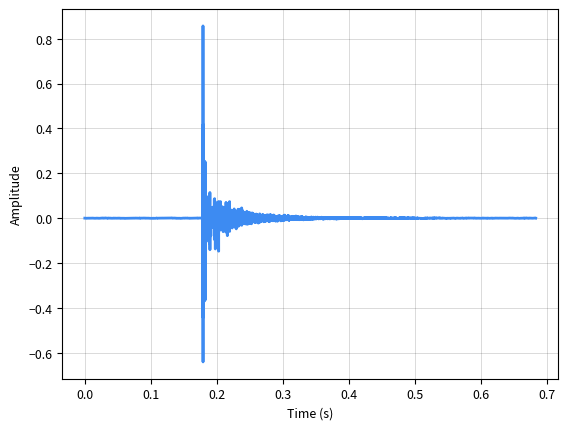

In [5]:
# plot IR amplitude
ir = irs[0,32,:]
t = np.arange(ir.shape[0]) / samplerate
plt.plot(t, ir, color=colors['blue'], linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.2)

plt.savefig('ir_amplitude.png', dpi=300, bbox_inches='tight')
plt.show()

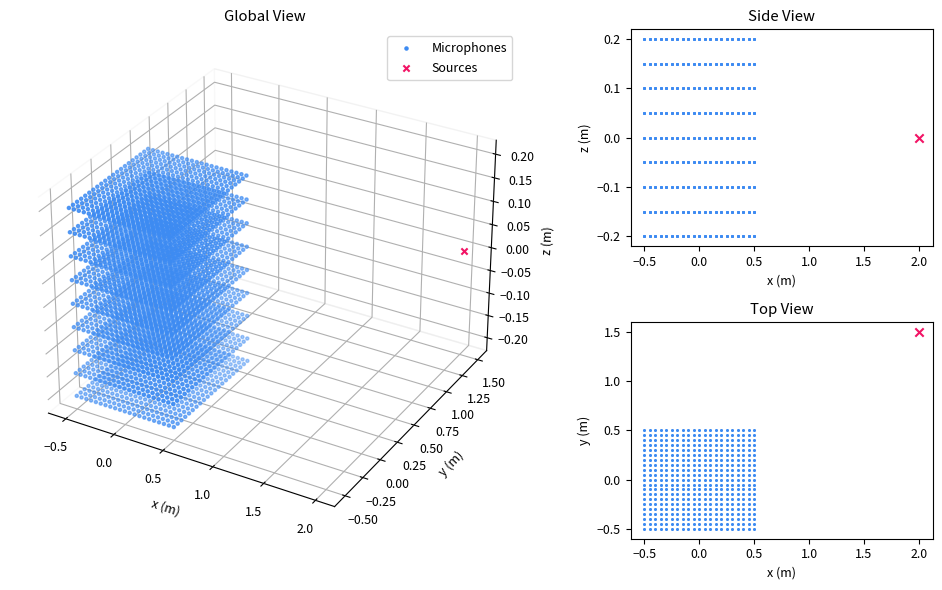

In [5]:
posMic, posSrc, irs = irutil.loadIR(Path('../mesh_rir/S1-M3969_npy'))
# Create a figure with a custom grid layout
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])

# Large plot on the left

ax1 = fig.add_subplot(gs[:, 0],projection='3d')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

ax1.scatter3D(posMic[:,0], posMic[:,1], posMic[:,2], marker='.', color=colors['blue'], label='Microphones')
ax1.scatter3D(posSrc[:,0], posSrc[:,1], posSrc[:,2], marker='x', color=colors['red'], label='Sources')
ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")
ax1.set_zlabel("z (m)")

ax1.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)

ax1.legend()
ax1.set_title('Global View')

# Smaller plots on the right
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(posMic[:,0], posMic[:,2], marker='.', color=colors['blue'], s=1, label='Microphones')
ax2.scatter(posSrc[:,0], posSrc[:,2], marker='x', color=colors['red'], label='Sources')
ax2.set_xlabel("x (m)")
ax2.set_ylabel("z (m)")
ax2.set_title('Side View')

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(posMic[:,0], posMic[:,1], marker='.', color=colors['blue'], s=1, label='Microphones')
ax3.scatter(posSrc[:,0], posSrc[:,1], marker='x', color=colors['red'], label='Sources')
ax3.set_xlabel("x (m)")
ax3.set_ylabel("y (m)")
ax3.set_title('Top View')

# Adjust layout and spacing
plt.tight_layout()

# Save or show the plot
plt.savefig('room_1.png', dpi=300)
plt.show()


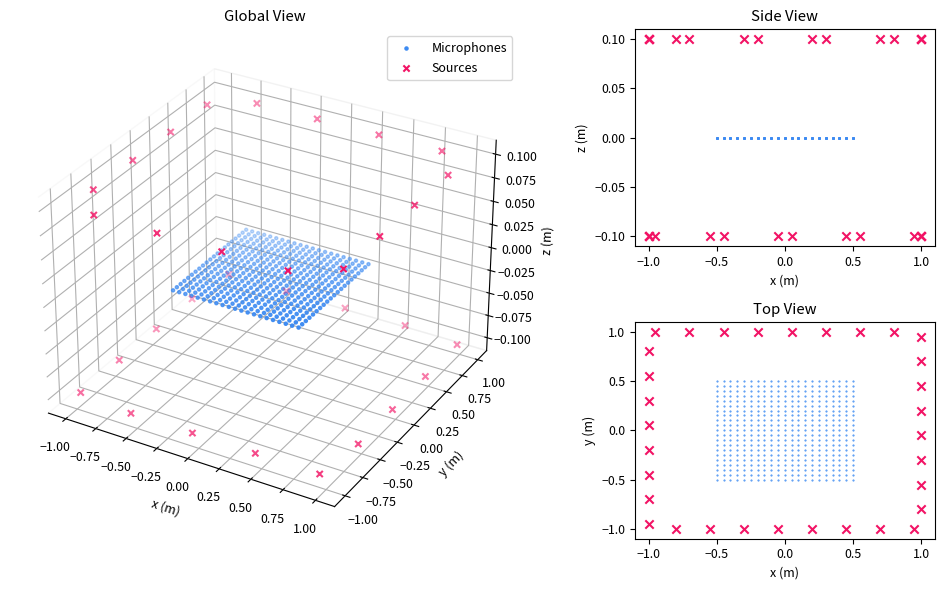

In [6]:
posMic, posSrc, irs = irutil.loadIR(Path('../mesh_rir/S32-M441_npy/'))
# Create a figure with a custom grid layout
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])

# Large plot on the left

ax1 = fig.add_subplot(gs[:, 0],projection='3d')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

ax1.scatter3D(posMic[:,0], posMic[:,1], posMic[:,2], marker='.', color=colors['blue'], label='Microphones')
ax1.scatter3D(posSrc[:,0], posSrc[:,1], posSrc[:,2], marker='x', color=colors['red'], label='Sources')
ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")
ax1.set_zlabel("z (m)")

ax1.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)

ax1.legend()
ax1.set_title('Global View')

# Smaller plots on the right
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(posMic[:,0], posMic[:,2], marker='.', color=colors['blue'], s=1, label='Microphones')
ax2.scatter(posSrc[:,0], posSrc[:,2], marker='x', color=colors['red'], label='Sources')
ax2.set_xlabel("x (m)")
ax2.set_ylabel("z (m)")
ax2.set_title('Side View')

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(posMic[:,0], posMic[:,1], marker='.', color=colors['blue'], s=1, label='Microphones')
ax3.scatter(posSrc[:,0], posSrc[:,1], marker='x', color=colors['red'], label='Sources')
ax3.set_xlabel("x (m)")
ax3.set_ylabel("y (m)")
ax3.set_title('Top View')

# Adjust layout and spacing
plt.tight_layout()

# Save or show the plot
plt.savefig('room_2.png', dpi=300)
plt.show()

(32, 441, 1025, 65)


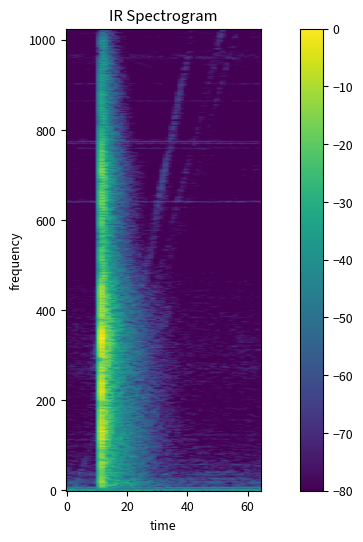

In [7]:
path = Path('../mesh_rir/S32-M441_npy')
spectrograms = np.load(path.joinpath('spectrograms.npy'), mmap_mode='r+')
print(spectrograms.shape)
data = spectrograms[12,30,:,:]

plt.figure(figsize=(10, 6))

plt.imshow(data, cmap='viridis', aspect=1.5/10)  # Use 'viridis' colormap
plt.colorbar()  # Add a colorbar for reference
plt.title("IR Spectrogram")
plt.xlabel("time")
plt.ylabel("frequency")
plt.gca().invert_yaxis()
plt.savefig('spectrogram.png', dpi=300, bbox_inches='tight')
plt.show()  # Display the plot


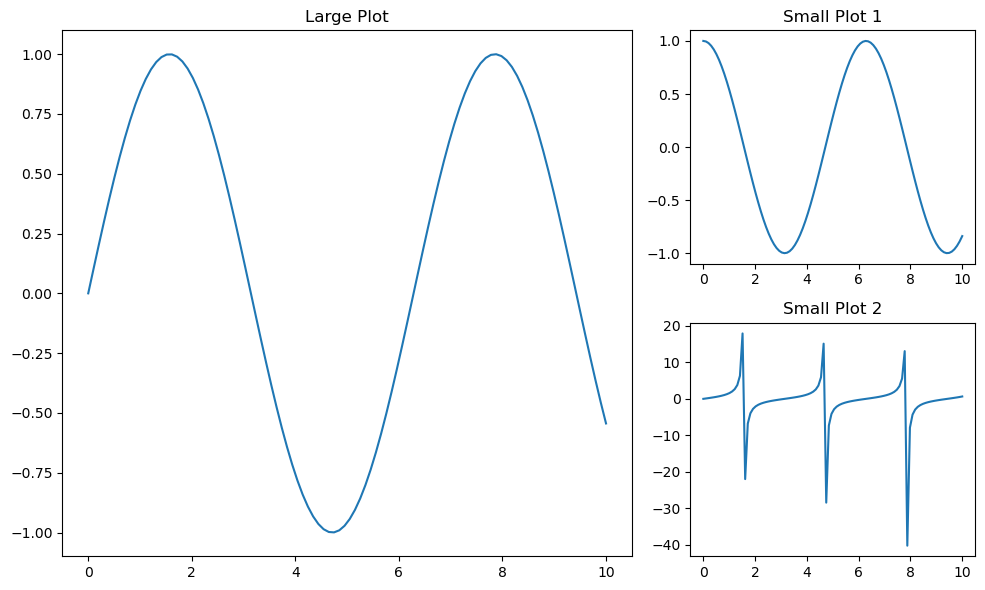

In [6]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

# Create some example data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Create a figure with a custom grid layout
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])

# Large plot on the left
ax1 = fig.add_subplot(gs[:, 0])
ax1.plot(x, y1)
ax1.set_title('Large Plot')

# Smaller plots on the right
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(x, y2)
ax2.set_title('Small Plot 1')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(x, y3)
ax3.set_title('Small Plot 2')

# Adjust layout and spacing
plt.tight_layout()

# Save or show the plot
#plt.savefig('custom_subplot_layout.png')
plt.show()
